# Задание лабораторной работы

- Выбрать набор данных (датасет).
- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
  - История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
  - На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
  - Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
  - Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
  - История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
- Сформировать отчет и разместить его в своем репозитории на github.

# Выполнение работы

## Текстовое описание датасета

Датасет содержит информацию о ресторанах

Данный набор доступен по адресу: https://www.kaggle.com/datasets/rajeshrampure/zomato-dataset

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline
sns.set(style="ticks")

## Подключение Google Диска для работы с Google Colab

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

## Чтение данных

In [3]:
data = pd.read_csv('../data/zomato.csv')

In [4]:
data.shape

(51717, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Набор содержит как категориальные признаки, так и числовые.

## preprocessing

In [8]:
data = data.drop(columns=['dish_liked'])
data = data.dropna()

In [9]:
data.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [10]:
data.shape

(42944, 16)

In [11]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [12]:
import re

rate_p = '[\d]+([.,][\d]+)?'
def parse_rate(s):
    if isinstance(s, str) and re.search(rate_p, s) is not None:
        for catch in re.finditer(rate_p, s):
            return int(float(catch[0].replace(',', '.')) * 10)
    else:
        return None
      

coast_p = '[\d]+([.,][\d]+)?'
def parse_coast(s):
    if isinstance(s, str) and re.search(coast_p, s) is not None:
        for catch in re.finditer(coast_p, s):
            return int(catch[0].replace(',', ''))
    else:
        return None

data['rate'] = data['rate'].apply(parse_rate)
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(parse_coast)

# Если остались наны
data = data.dropna()

data['rate'] = data['rate'].astype('int64')
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype('int64')

print(data.shape)
print(data.isnull().sum())

# from sklearn import preprocessing
# not_number_cols = data.select_dtypes(include=['object'])
# le = preprocessing.LabelEncoder()

# for col_name in not_number_cols:
#     data[col_name] = le.fit_transform(data[col_name])

data.info()

(40687, 16)
url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40687 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          40687 non-null  object
 1   address                      40687 non-null  object
 2   name                         40687 non-null  object
 3   online_order                 40687 non-null  obj

## История о данных

Возьмем признаки: `rest_type` (категориальный), `approx_cost(for two people)` (числовой) и `rate` (числовой). По методологии `data_to_viz` построим `Scatter Plot` (Точечный график), `2D Density` (Двумерное распределение), `Box Plot` (Ящик с усами), `Violin Plot` и `Correlogram`.

In [13]:
x = data["rate"]
y = data["approx_cost(for two people)"]
z = data["rest_type"]
d = data[["rate", "approx_cost(for two people)", "rest_type"]]

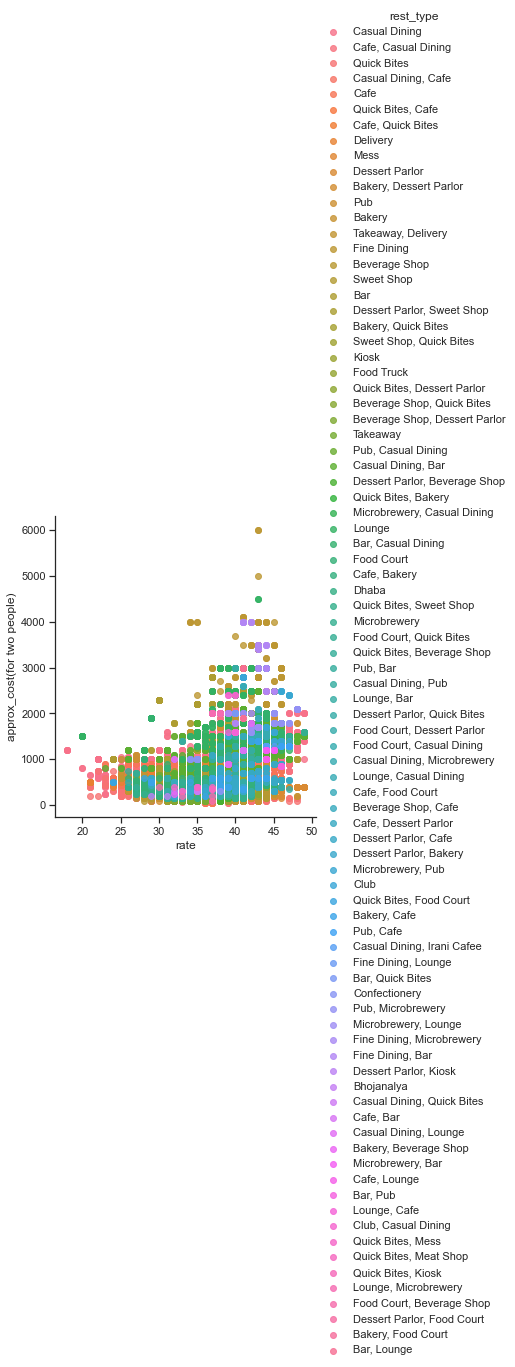

In [14]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="rate", y="approx_cost(for two people)", data=d, fit_reg=False, hue="rest_type", legend=True)

# Move the legend to an empty part of the plot
# plt.legend(loc='lower right')

plt.show()

Точечный график (`Scatter Plot`) показывает зависимость между двумя числовыми признаками - `approx_cost(for two people)` и `rate`. По графику можно сделать вывод о том, что в среднем чем выше стоимость среднего цека, тем выше оценка заведения. Цветными метками отображены распределение по `rest_type`.

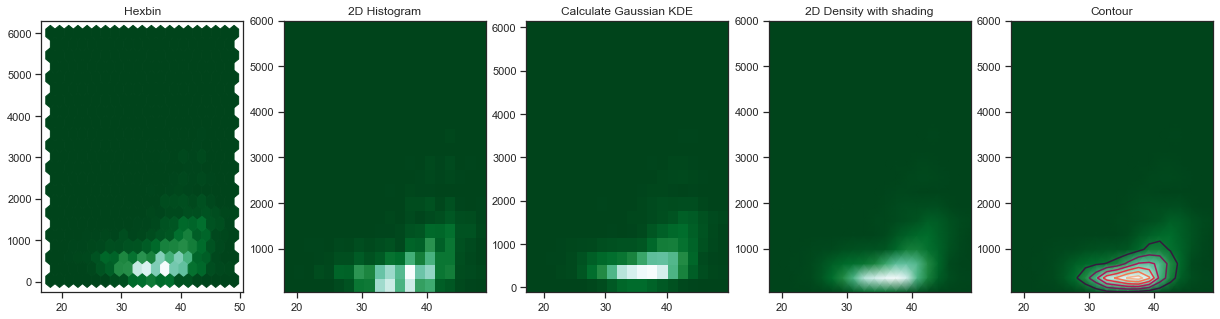

In [15]:
from scipy.stats import kde

a = x, y

# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(21, 5))

# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[0].set_title('Hexbin')
axes[0].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)

# 2D Histogram
axes[1].set_title('2D Histogram')
axes[1].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(a)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# plot a density
axes[2].set_title('Calculate Gaussian KDE')
axes[2].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.BuGn_r)

# add shading
axes[3].set_title('2D Density with shading')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)

# contour
axes[4].set_title('Contour')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[4].contour(xi, yi, zi.reshape(xi.shape) )

Двумерное распределение по признакам `rate` и `approx_cost(for two people)` показывает в цветном эквиваленте где больше всего есть значений данных. Чем ярче область, тем больше значений. По графикам видно, что наибольшее сосредоточенность данных присутствует в ресторанах с рейтингом от 3 до 4 баллов, ближе к 4, с чеком денее 1000 долларов.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85]),
 [Text(0, 0, 'Casual Dining'),
  Text(1, 0, 'Cafe, Casual Dining'),
  Text(2, 0, 'Quick Bites'),
  Text(3, 0, 'Casual Dining, Cafe'),
  Text(4, 0, 'Cafe'),
  Text(5, 0, 'Quick Bites, Cafe'),
  Text(6, 0, 'Cafe, Quick Bites'),
  Text(7, 0, 'Delivery'),
  Text(8, 0, 'Mess'),
  Text(9, 0, 'Dessert Parlor'),
  Text(10, 0, 'Bakery, Dessert Parlor'),
  Text(11, 0, 'Pub'),
  Text(12, 0, 'Bakery'),
  Text(13, 0, 'Takeaway, Delivery'),
  Text(14, 0, 'Fine Dining'),
  Text(15, 0, 'Beverage Shop'),
  Text(16, 0, 'Sweet Shop'),
  Text(17, 0, 'Bar'),
  Text(18, 0, 'Dessert Parlor, Sweet Shop'),
  Text(19, 0, 'Ba

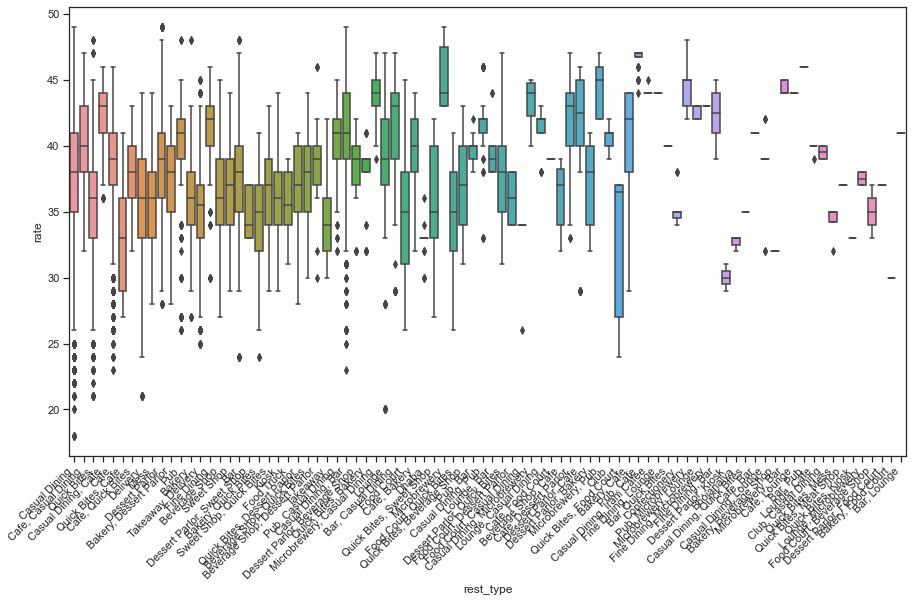

In [16]:
plt.subplots(figsize=(15, 8.27))
ax = sns.boxplot( x=z, y=x )
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light')

График "Ящик с усами" показывает распределение ресторанов по типам ресторанов. По графикам видно, что "фудкорты" и "пабы" обладают одним из наиболее высоких рейтингов. "Дайнеры" и "пекарни" - одним из самых низких.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85]),
 [Text(0, 0, 'Casual Dining'),
  Text(1, 0, 'Cafe, Casual Dining'),
  Text(2, 0, 'Quick Bites'),
  Text(3, 0, 'Casual Dining, Cafe'),
  Text(4, 0, 'Cafe'),
  Text(5, 0, 'Quick Bites, Cafe'),
  Text(6, 0, 'Cafe, Quick Bites'),
  Text(7, 0, 'Delivery'),
  Text(8, 0, 'Mess'),
  Text(9, 0, 'Dessert Parlor'),
  Text(10, 0, 'Bakery, Dessert Parlor'),
  Text(11, 0, 'Pub'),
  Text(12, 0, 'Bakery'),
  Text(13, 0, 'Takeaway, Delivery'),
  Text(14, 0, 'Fine Dining'),
  Text(15, 0, 'Beverage Shop'),
  Text(16, 0, 'Sweet Shop'),
  Text(17, 0, 'Bar'),
  Text(18, 0, 'Dessert Parlor, Sweet Shop'),
  Text(19, 0, 'Ba

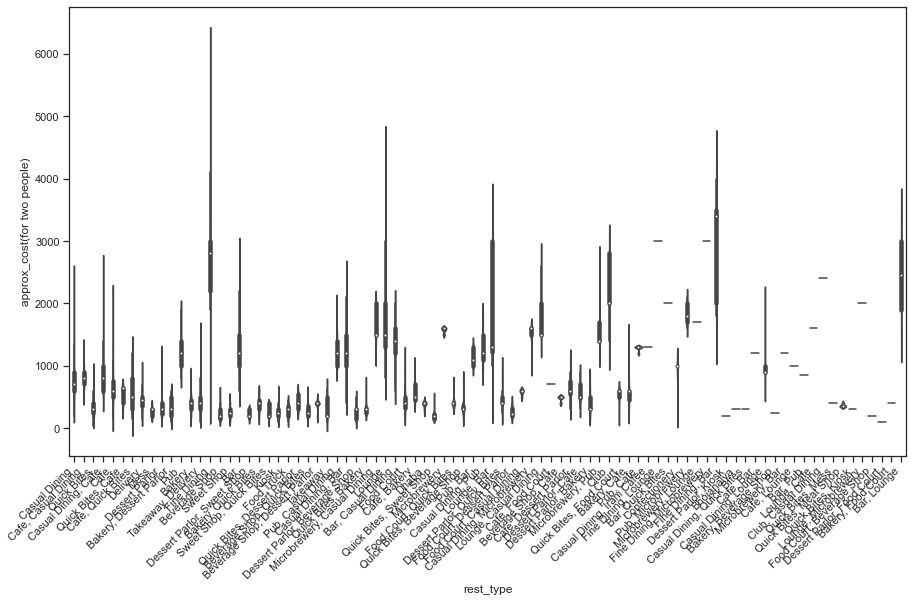

In [17]:
plt.subplots(figsize=(15, 8.27))
ax = sns.violinplot(x=z, y=y)
plt.xticks(rotation=45,horizontalalignment='right',fontweight='light')

Violin Plot также показывает распределение по типам ресторанов, как и Box Plot. Только в качестве второго признака был выбран признак `approx_cost(for two people)` вместо `rate`. По графику видно, что величина чека зависит от статусности заведения. Закусочные и фудкорты поднимаются выше среднего сегмента. Чеки в барах, ланжах и ресторанах дороже.

ValueError: The `markers` argument has the wrong number of values

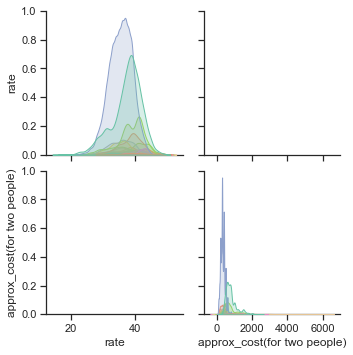

In [18]:
sns.pairplot(d, kind="scatter", hue="rest_type", markers=["o", "s", "D"], palette="Set2")
plt.show()

Парные диаграммы (`Correlogram`) показывают зависимости между двумя признаками на совокупности различных диаграмм. Зависимость рейтинга от цены совпадает с предыдущими выводами.